In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Data

In [2]:
admission_df = pd.read_csv('./datasets/Admission_Predict.csv')
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Exploration

In [4]:
# Check null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
# Check the dataframe info
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
# Group by University ranking
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# Visualization

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

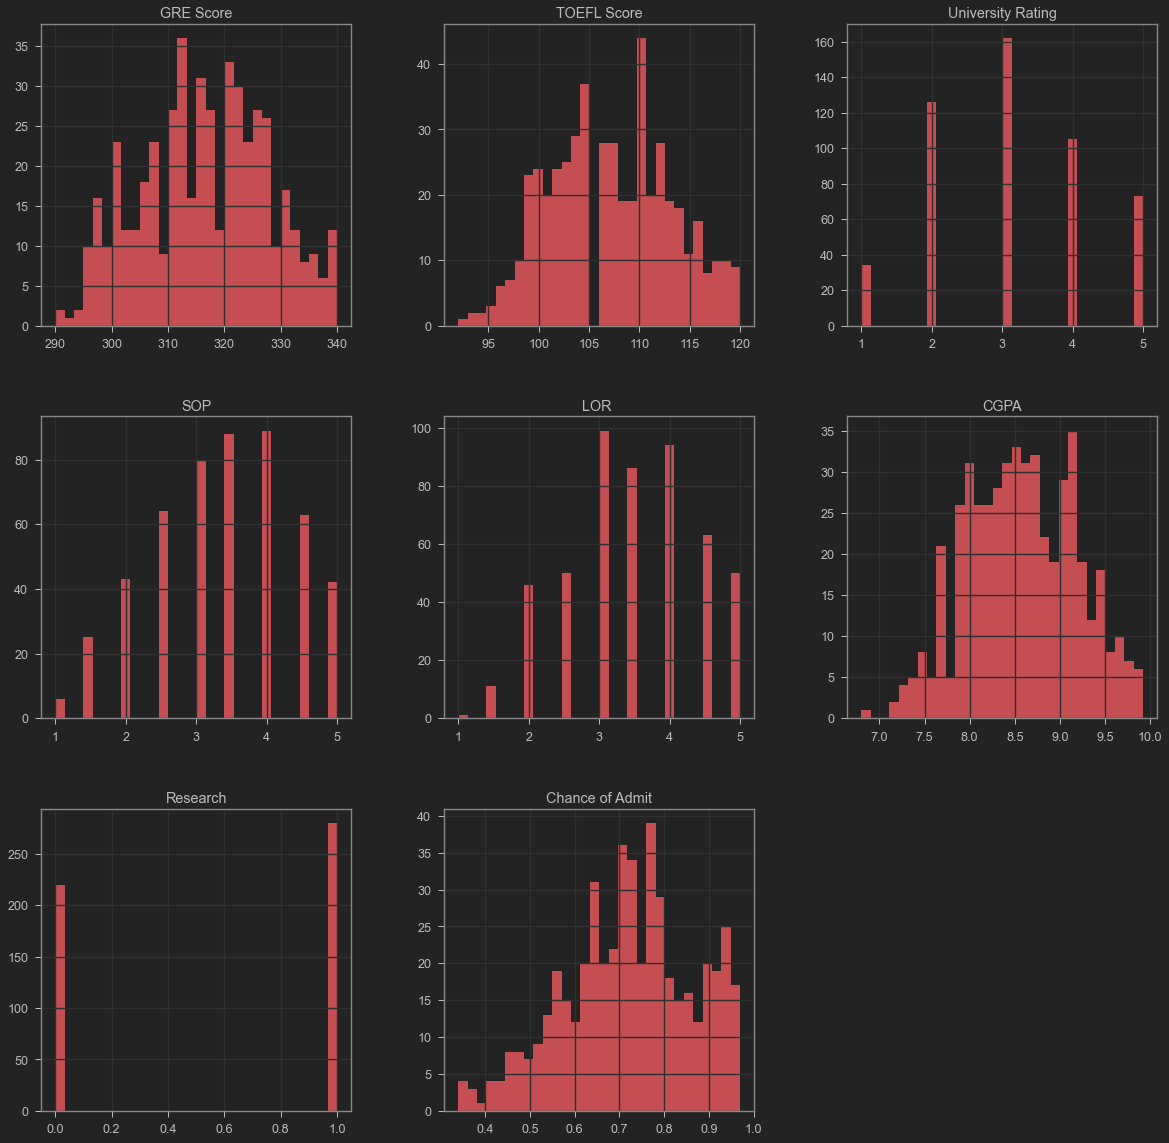

In [8]:
admission_df.hist(bins = 30, figsize = (20,20), color = 'r')

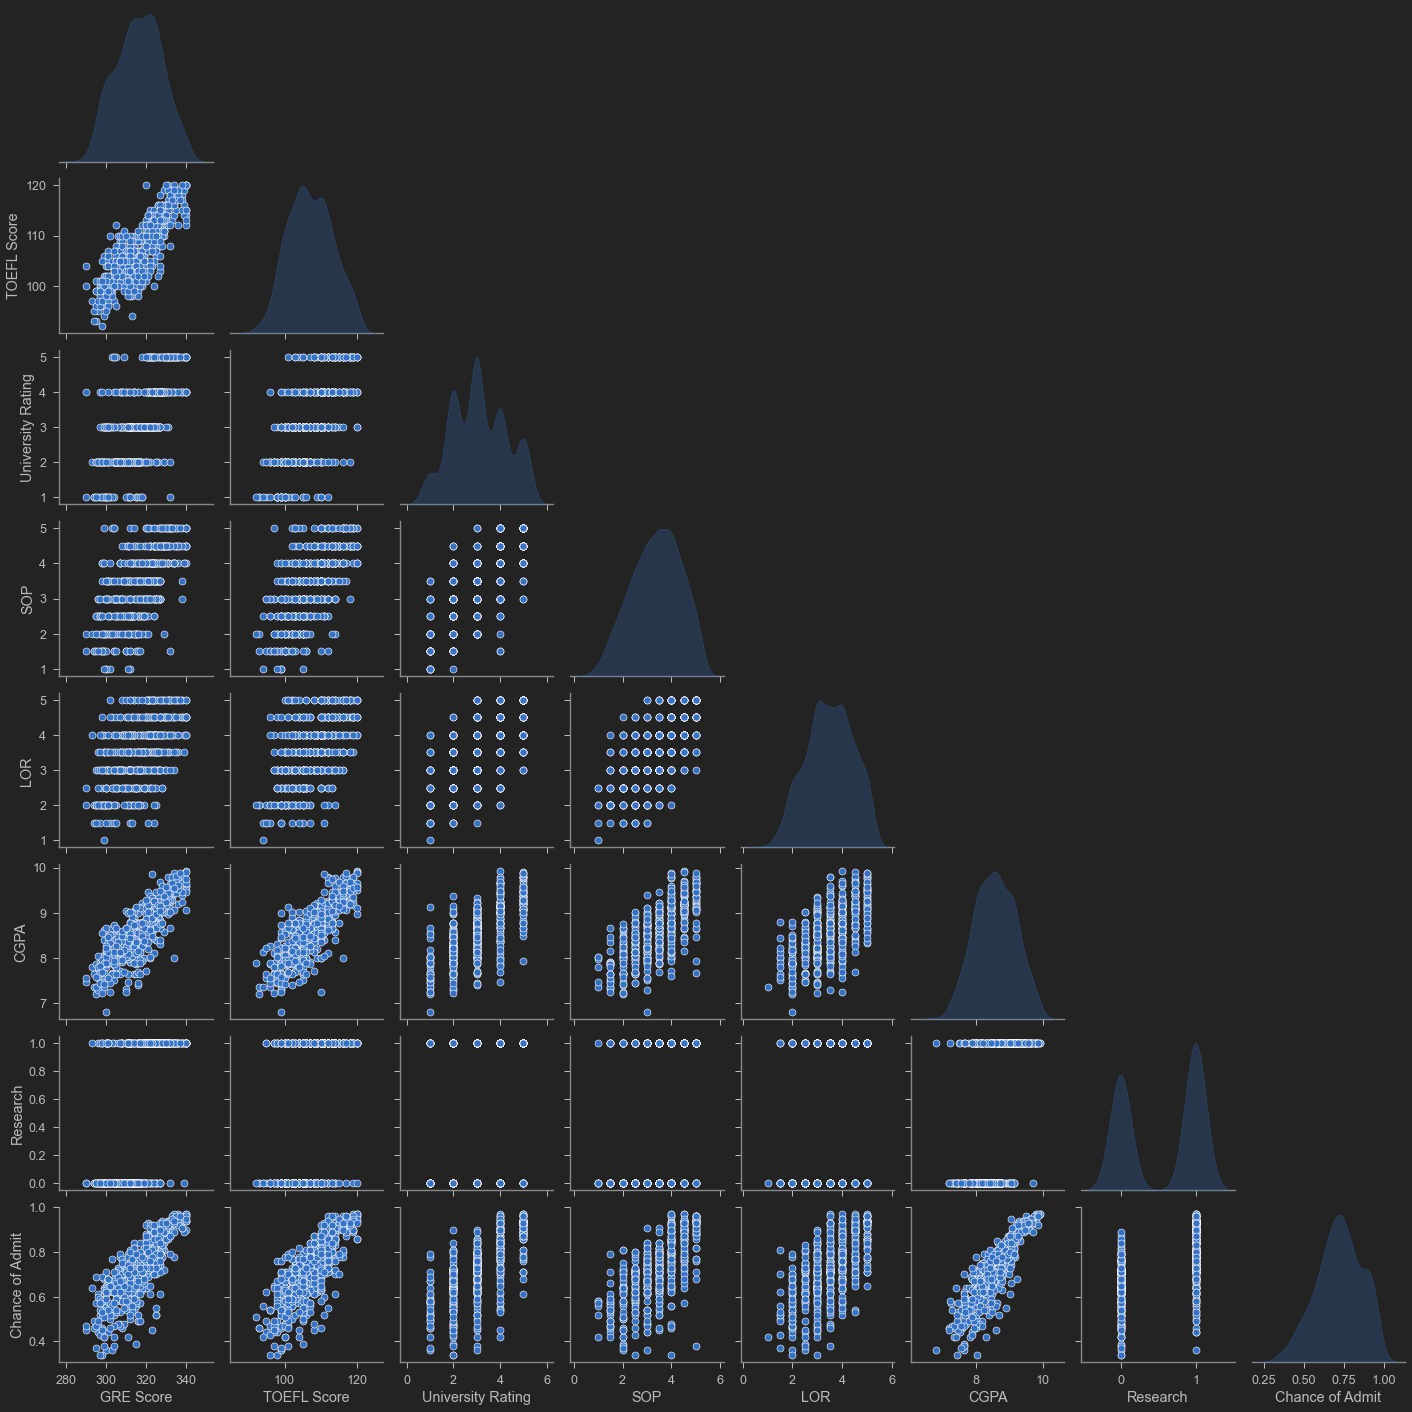

In [9]:
sns.pairplot(admission_df,  diag_kind = 'kde', corner=True)

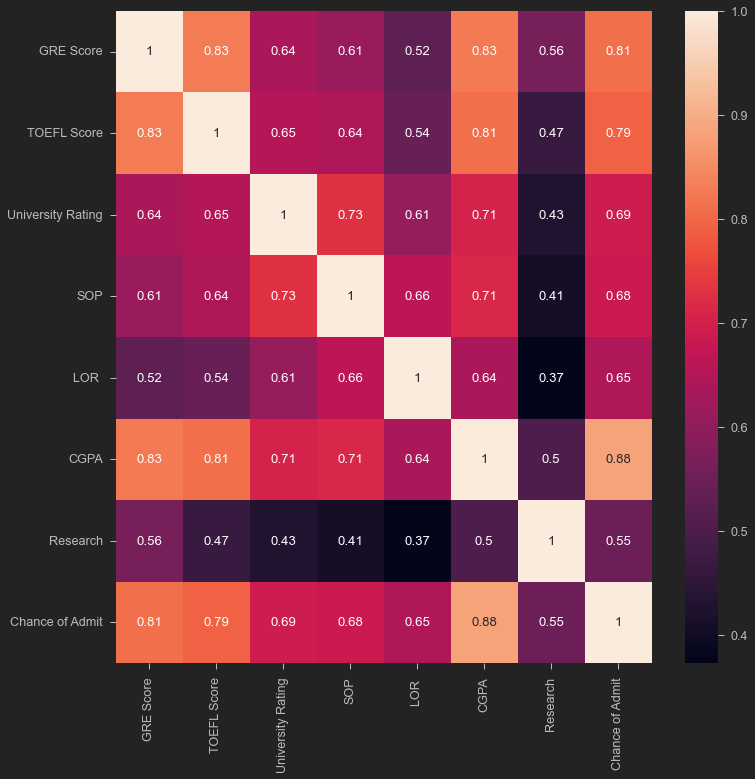

In [10]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Split Data

In [11]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
X = admission_df.drop(columns = ['Chance of Admit'])
y = admission_df['Chance of Admit']

X.shape, y.shape

((500, 7), (500,))

In [13]:
# Convert pandas df to numpy arrays
X = np.array(X)
y = np.array(y)

In [14]:
y = y.reshape(500,1)
X.shape, y.shape

((500, 7), (500, 1))

In [15]:
# Scale data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

In [16]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

# Models
### Multiple Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [18]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.799187525474621

### ANN

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [21]:
ANN_model  = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [22]:
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [23]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
22/22 [==============================] - 0s 678us/step - loss: 0.5133
Epoch 2/100
22/22 [==============================] - 0s 589us/step - loss: 0.3330
Epoch 3/100
22/22 [==============================] - 0s 589us/step - loss: 0.3141
Epoch 4/100
22/22 [==============================] - 0s 544us/step - loss: 0.2903
Epoch 5/100
22/22 [==============================] - 0s 544us/step - loss: 0.2802
Epoch 6/100
22/22 [==============================] - 0s 589us/step - loss: 0.2595
Epoch 7/100
22/22 [==============================] - 0s 589us/step - loss: 0.2354
Epoch 8/100
22/22 [==============================] - 0s 589us/step - loss: 0.2300
Epoch 9/100
22/22 [==============================] - 0s 589us/step - loss: 0.2207
Epoch 10/100
22/22 [==============================] - 0s 589us/step - loss: 0.2170
Epoch 11/100
22/22 [==============================] - 0s 544us/step - loss: 0.2062
Epoch 12/100
22/22 [==============================] - 0s 589us/step - loss: 0.2271
Epoch 13/100


22/22 [==============================] - 0s 589us/step - loss: 0.1305
Epoch 100/100
22/22 [==============================] - 0s 589us/step - loss: 0.1329


In [24]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print('Accuracy :  {}'.format(accuracy_ANN))

3/3 [==============================] - 0s 665us/step - loss: 0.3063
Accuracy :  0.6937346756458282


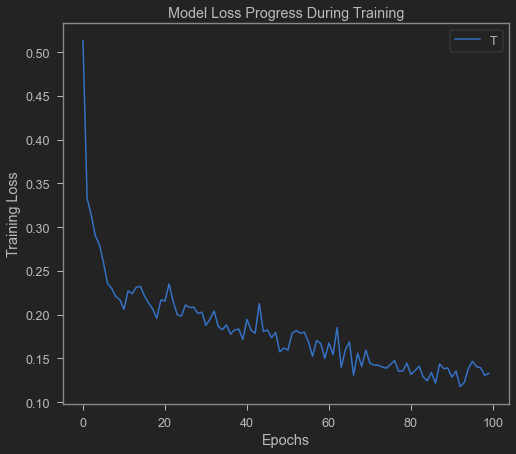

In [25]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend('Training Loss')

### Decision Trees & Random Forest Models

In [26]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.508840169731259

In [28]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators = 100, max_depth = 10)
RandomForest_model.fit(X_train, y_train)

C:\Users\mleyf\AppData\Local\Temp\ipykernel_1036\3171168129.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.7382456928173717

# Key Perfomance Indicators

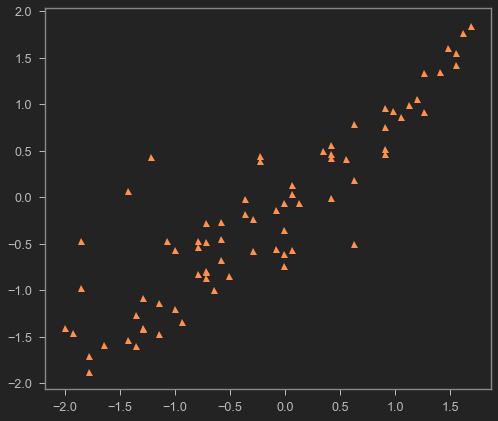

In [30]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'y')

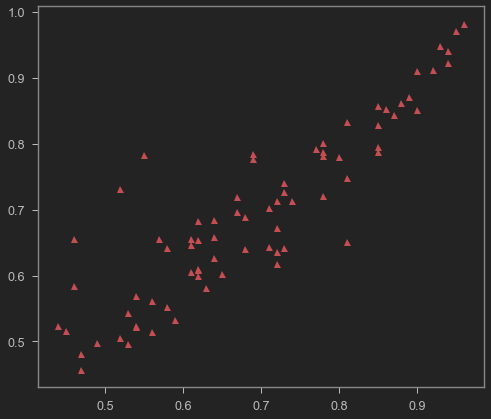

In [31]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [32]:
# Number of independent variables
k = X_test.shape[1]
# Number of samples
n = len(X_test)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

MAE = mean_absolute_error(y_test_orig, y_predict_orig)
MSE = mean_squared_error(y_test_orig, y_predict_orig)
RMSE = float(format(np.sqrt(MSE), '.3f'))
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2)*(n - 1)/(n - k - 1)

In [34]:
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.064 
MSE = 0.00403838348769971 
MAE = 0.04319821040433452 
R2 = 0.799187525474621 
Adjusted R2 = 0.7782071176883874


In [36]:
X = [1,2,3,4]
X = np.array(X)
X = X.reshape(-1,1)
X.shape

(4, 1)

In [37]:
accuracy_LinearRegression

0.799187525474621

In [38]:
accuracy_ANN

0.6937346756458282

In [39]:
accuracy_DecisionTree

0.508840169731259

In [40]:
accuracy_RandomForest

0.7382456928173717